# 실습

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("wine.csv")
df

,Unnamed: 0,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


### 열의 합 (sum)

In [5]:
# 1) sum 메소드 활용

df['ash'].sum()

421.24

In [6]:
# 2) for문 활용

sum_ash = 0
for val in df['ash'] :
    sum_ash += val
print(sum_ash)

421.2400000000002


### 열의 평균(average)

In [7]:
# 1) mean 메소드 활용

df['ash'].mean()

2.3665168539325854

In [8]:
# 2) for문 활용

sum_ash = 0
for val in df['ash']:
    sum_ash += val
mean_ash = sum_ash/len(df['ash'])
print(mean_ash)

2.3665168539325854


### 열의 분산(variation)

In [9]:
# 1. var 메소드 사용

df['ash'].var()

## pandas는 n-1으로 나누고
## numpy는 n로 나눔

0.07526463530756043

In [10]:
# 2. for 문 사용 
ss_ash = 0
for val in df['ash']:
    ss_ash += (val-mean_ash)**2
var_ash = ss_ash/(len(df['ash'])-1)
print(var_ash)

#value = 밸류
#variation = 분산

0.07526463530756043


### 표준편차

In [11]:
# 1) std 메소드 사용

df ['ash'].std()

0.2743440090608148

In [12]:
# 2) 분산 사용

std_ash= var_ash**0.5
print(std_ash)

0.2743440090608148


### 공분산(Covariance)
- 상관관계 알수 있음 but 정확하진 않음 !
    - why? 단위에 영향을 받기 때문에 
- 그래서, 상관계수 구해야함!!
- 그렇지만, 공분산을 구하면 각 분산도 알수 있음 !
- xtx = 공분산

In [14]:
# 공분산 방법 1)

ash = df['ash']
ci = df['color_intensity']
np.cov(ash,ci)

array([[0.07526464, 0.16465433],
       [0.16465433, 5.37444938]])

In [15]:
# 공분산 방법 2)

n = len(df['ash'])
mean_ash = ash.mean()
mean_ci = ci.mean()
res = 0
for i in range(0,n) :
    res += (ash[i]-mean_ash)*(ci[i]-mean_ci)
covariance = res/(n-1)
print(covariance)

0.16465432664889224


In [16]:
((ash-mean_ash).T @ (ci-mean_ci))/(n-1)
#np.transpose = .T
# @ = 행렬 곱하기
# n으로 해도 상관없음 !

0.1646543266488923

### 상관계수(correlation coefficient)
- x,y 간의 관계 확인
- -1 <=corr <= 1
- 자기자신 = 1 (대각원소)
- 상관계수가 0.6 or 0.7 이면 상관관계가 있다 !

In [17]:
np.corrcoef(ash, ci)
# ash와 ci 는 있긴 있는데 강한 상관관계가 아님

array([[1.        , 0.25888726],
       [0.25888726, 1.        ]])

### 히스토그램

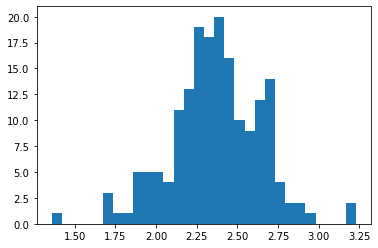

In [18]:
plt.hist(df['ash'], bins= 30)
plt.show()

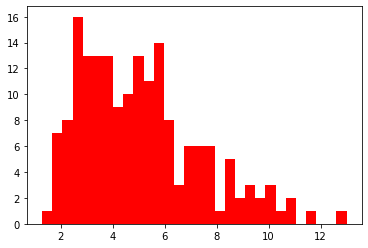

In [19]:
plt.hist(df['color_intensity'], bins=30, color='red')
plt.show()

### 히스토그램 with 조건부확률

In [38]:
# ash>2.5 일때, color_intensity >8 일 확률

ash25 = df[df['ash']>2.5]
ci = ash25[ash25['color_intensity']>8]

In [39]:
len(ci)/len(ash25)

0.1346153846153846

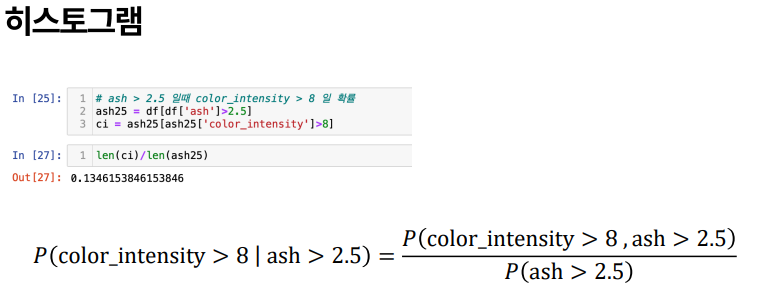

## 가설검정

### 1. 두 집단 평균 차이 검정

In [21]:
df_A = df[df['ash']>2.35]
df_B = df[df['ash']<=2.35]

In [22]:
a = df_A['alcohol']
b = df_B['alcohol']
n1 = len(a)
n2 = len(b)

mean_a = a.mean()
mean_b = b.mean()
print(mean_a)
print(mean_b)

var_a = a.var()
var_b = b.var()

s = ((var_a/n1)+ (var_b/n2))**0.5
print(s)

13.171847826086958
12.817441860465118
0.11874509484834071


In [24]:
z_value = (mean_a - mean_b)/s
print(z_value)

2.9845945727230383


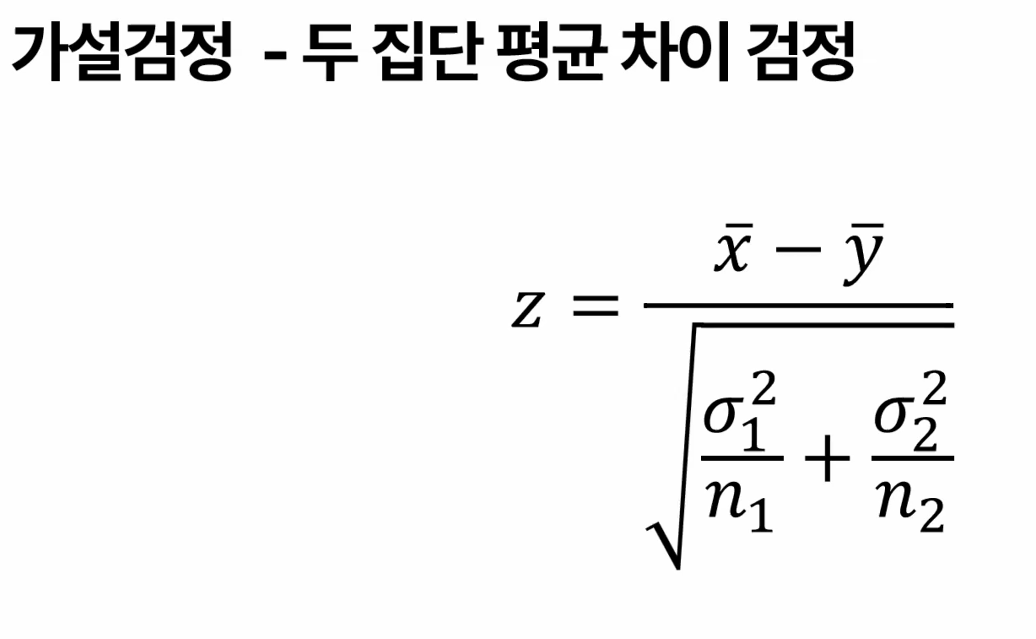

In [25]:
z_dist = stats.norm(0,1)
p_value = 1- z_dist.cdf(z_value)
p_value

0.0014197720399459213

### 2. 세 집단 평균 차이 검정

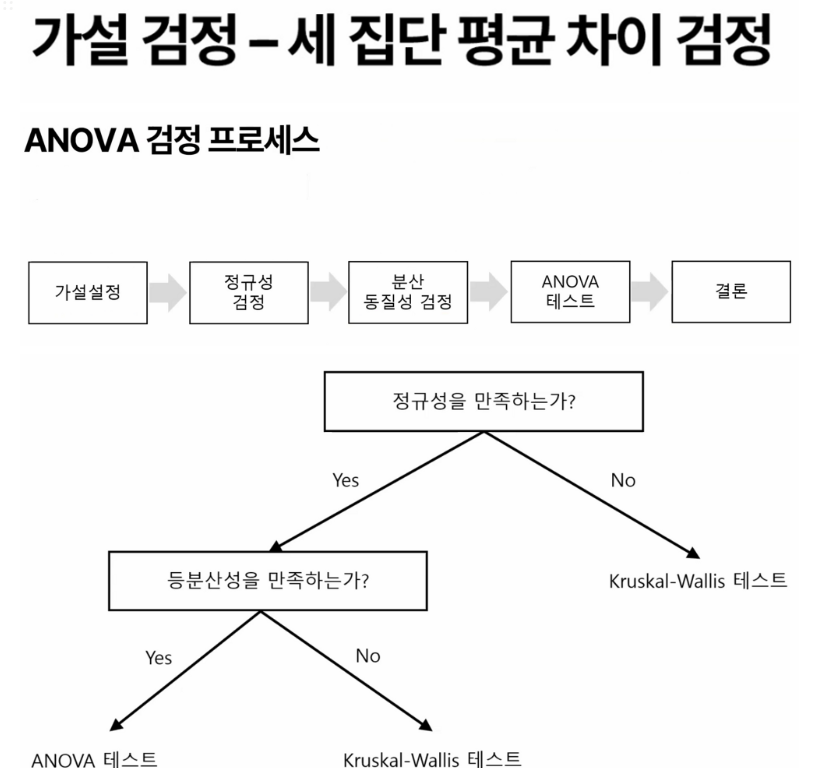

In [26]:
df_A = df[df['ash']<2.28]
df_B = df[(df['ash']>=2.28)&(df['ash']<=2.47)]
df_C = df[df['ash']>2.47]

In [27]:
a = df_A['alcohol']
b = df_B['alcohol']
c = df_C['alcohol']

In [28]:
n1 = len(a)
n2 = len(b)
n3 = len(c)
print(n1)
print(n2)
print(n3)

59
58
61


### 1) 정규성 검정(각 집단이 정규분포를 따르는지 확인)

In [29]:
test_stat, p = stats.shapiro(a)
print("검정통계량: {}, p-value: {}".format(test_stat,p))

test_stat, p = stats.shapiro(b)
print("검정통계량: {}, p-value: {}".format(test_stat,p))

test_stat, p = stats.shapiro(c)
print("검정통계량: {}, p-value: {}".format(test_stat,p))

검정통계량: 0.9709163308143616, p-value: 0.16921241581439972
검정통계량: 0.9692205190658569, p-value: 0.14712165296077728
검정통계량: 0.9448610544204712, p-value: 0.008268149569630623


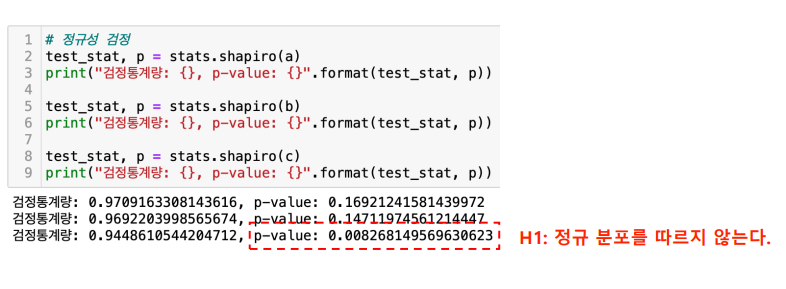

### 2) 분산 동질성 검정 (각 집단간 분산이 동일한지 확인)

In [30]:
# 분산 동질성 검정
stats.bartlett(a,b,c)

BartlettResult(statistic=1.2778020504975895, pvalue=0.5278722236377771)

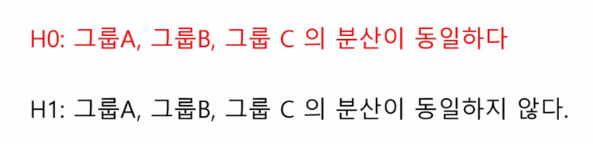

### 3) ANOVA 검정 및 Kruskal-Wallis 검정

In [32]:
# ANOVA 검정

f_val, p_val = stats.f_oneway(a,b,c)
print('F-통계량: ', f_val)
print('p-value: ', p_val)

F-통계량:  5.153211984906106
p-value:  0.006689793066378117


In [33]:
# Kruskal-Wallis 검정

f_val, p_val = stats.kruskal(a,b,c)
print('F-통계량: ', f_val)
print('p-value: ', p_val)

F-통계량:  10.300136172298497
p-value:  0.0057990098811482715


- ANOVA 검정에서만 H0가 채택되어야 하고,
- 정규성검정, 분산 동질성 검정은 H1이 채택되어야 함 !!